# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session.start(
    tt.SessionConfig(user_content_storage="./content", port=55708)
)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    data_types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
BL 1-Click Camera - Free,PHOTOGRAPHY,Photography,2.0.160818,3.5,52.0,1800000.0,10000.0,Free,0.0,Everyone,"August 18, 2016",2.3 and up
ZArchiver Donate,TOOLS,Tools,Varies with device,4.8,1721.0,<NA>,10000.0,Paid,2.5,Everyone,"February 16, 2018",Varies with device
Fu*** Weather (Funny Weather),WEATHER,Weather,Varies with device,4.7,20001.0,<NA>,1000000.0,Free,0.0,Mature 17,"July 26, 2018",Varies with device
"GO Security－AntiVirus, AppLock, Booster",TOOLS,Tools,Varies with device,4.7,1251479.0,<NA>,10000000.0,Free,0.0,Everyone,"July 24, 2018",Varies with device
The Zueira's Voice,TOOLS,Tools,4.75,4.7,136540.0,3100000.0,1000000.0,Free,0.0,Everyone,"July 10, 2018",4.0.3 and up


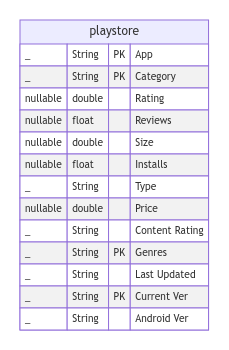

In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
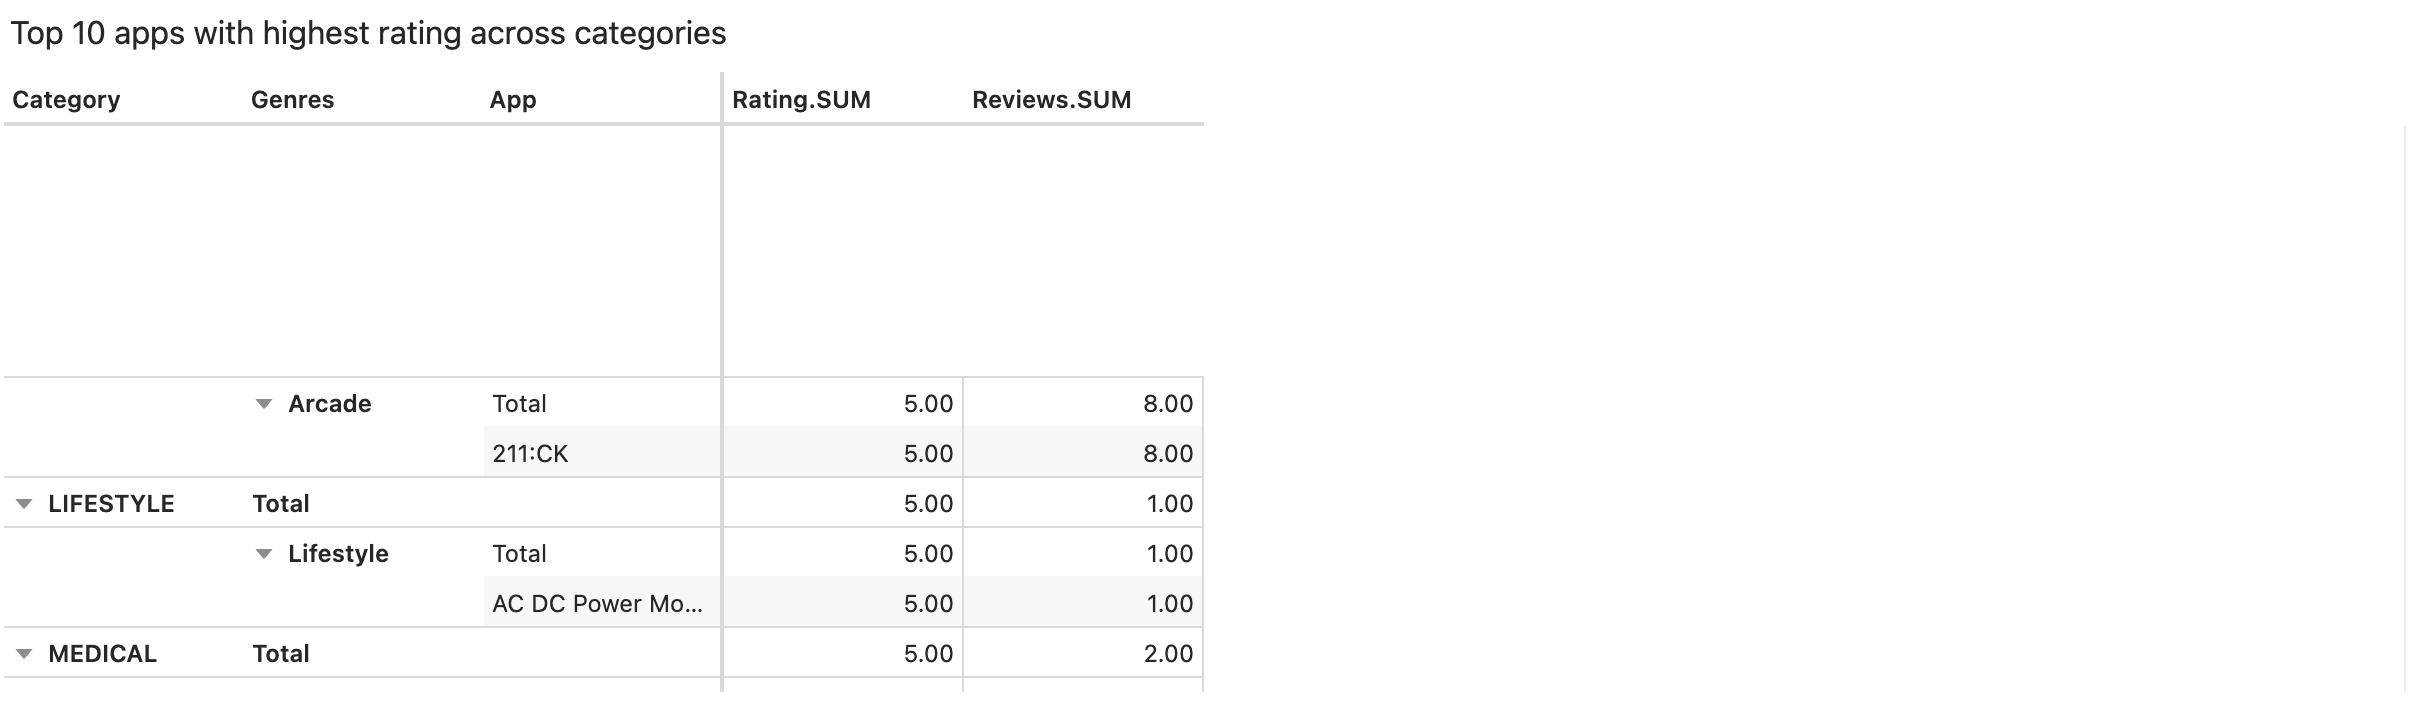

In [4]:
session.widget

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'Installs.SUM': <atoti.measure.Measure object at 0x133a32aa0>, 'Size.SUM': <atoti.measure.Measure object at 0x133ab78b0>, 'Price.SUM': <atoti.measure.Measure object at 0x133ab7940>, 'Installs.MEAN': <atoti.measure.Measure object at 0x133ab78e0>, 'contributors.COUNT': <atoti.measure.Measure object at 0x133ab7970>, 'Rating.MEAN': <atoti.measure.Measure object at 0x133ab7070>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x133ab7850>, 'Rating.SUM': <atoti.measure.Measure object at 0x133ab54e0>, 'Price.MEAN': <atoti.measure.Measure object at 0x133ab6590>, 'Size.MEAN': <atoti.measure.Measure object at 0x133ab74c0>, 'Reviews.SUM': <atoti.measure.Measure object at 0x133ab68f0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x133ab77c0>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
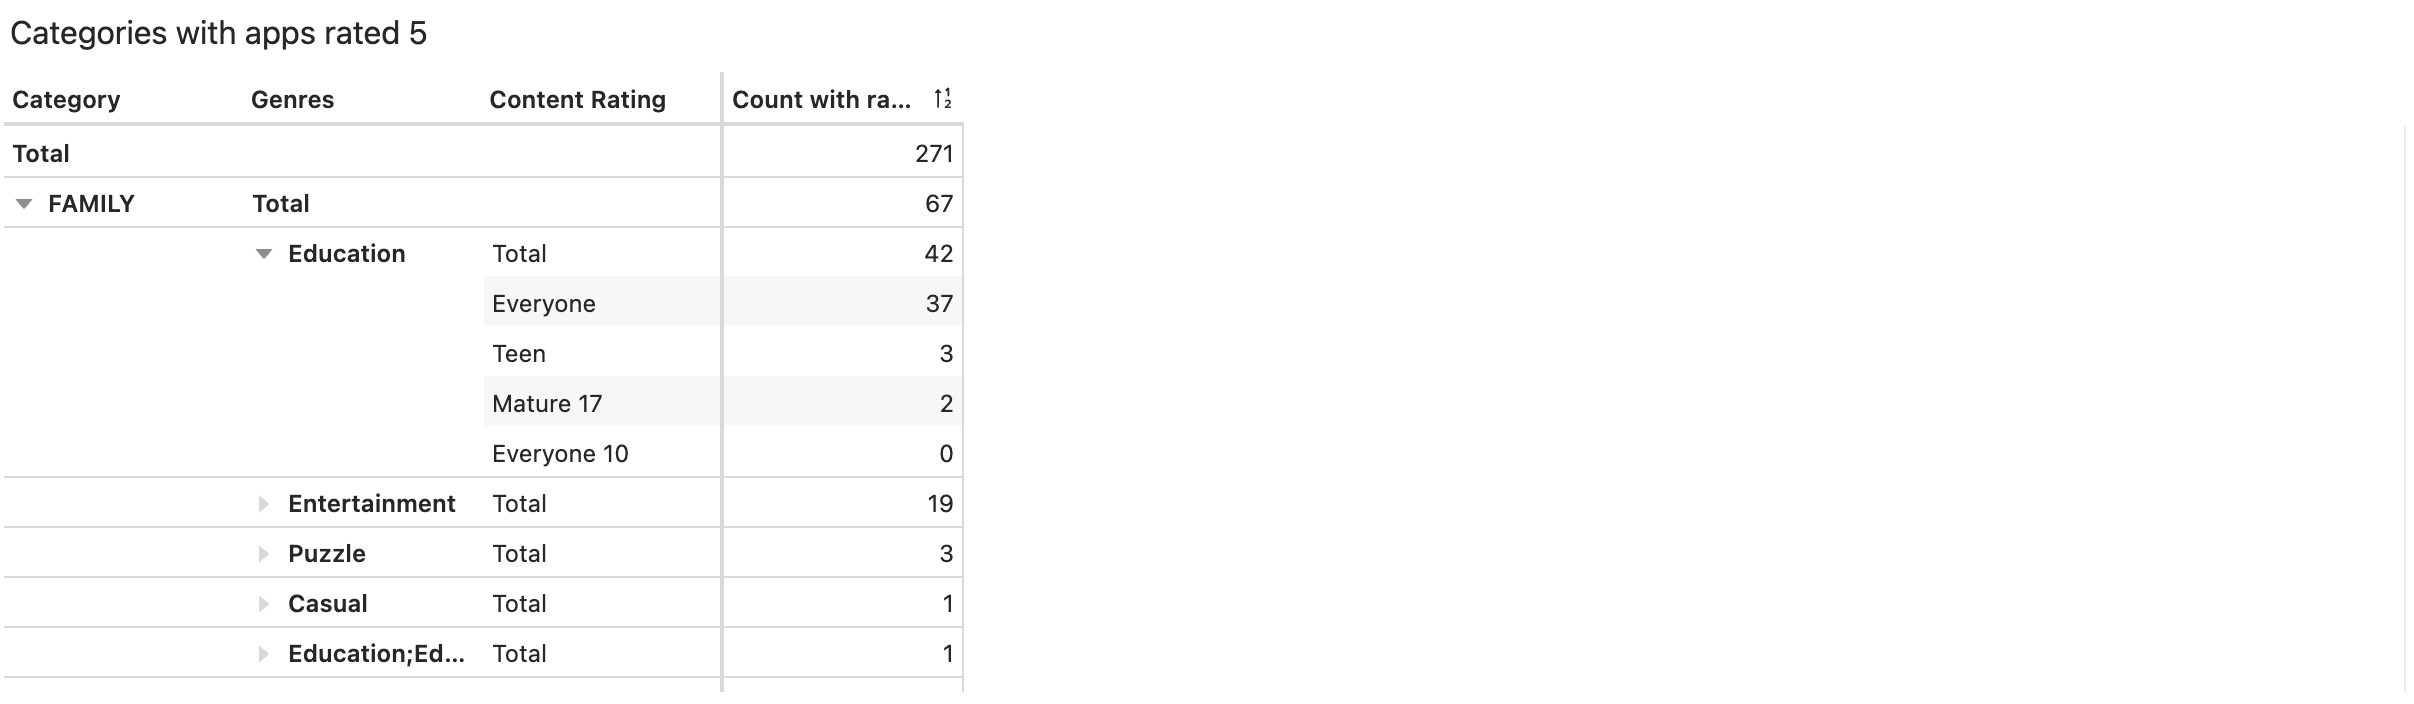

In [7]:
session.widget

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
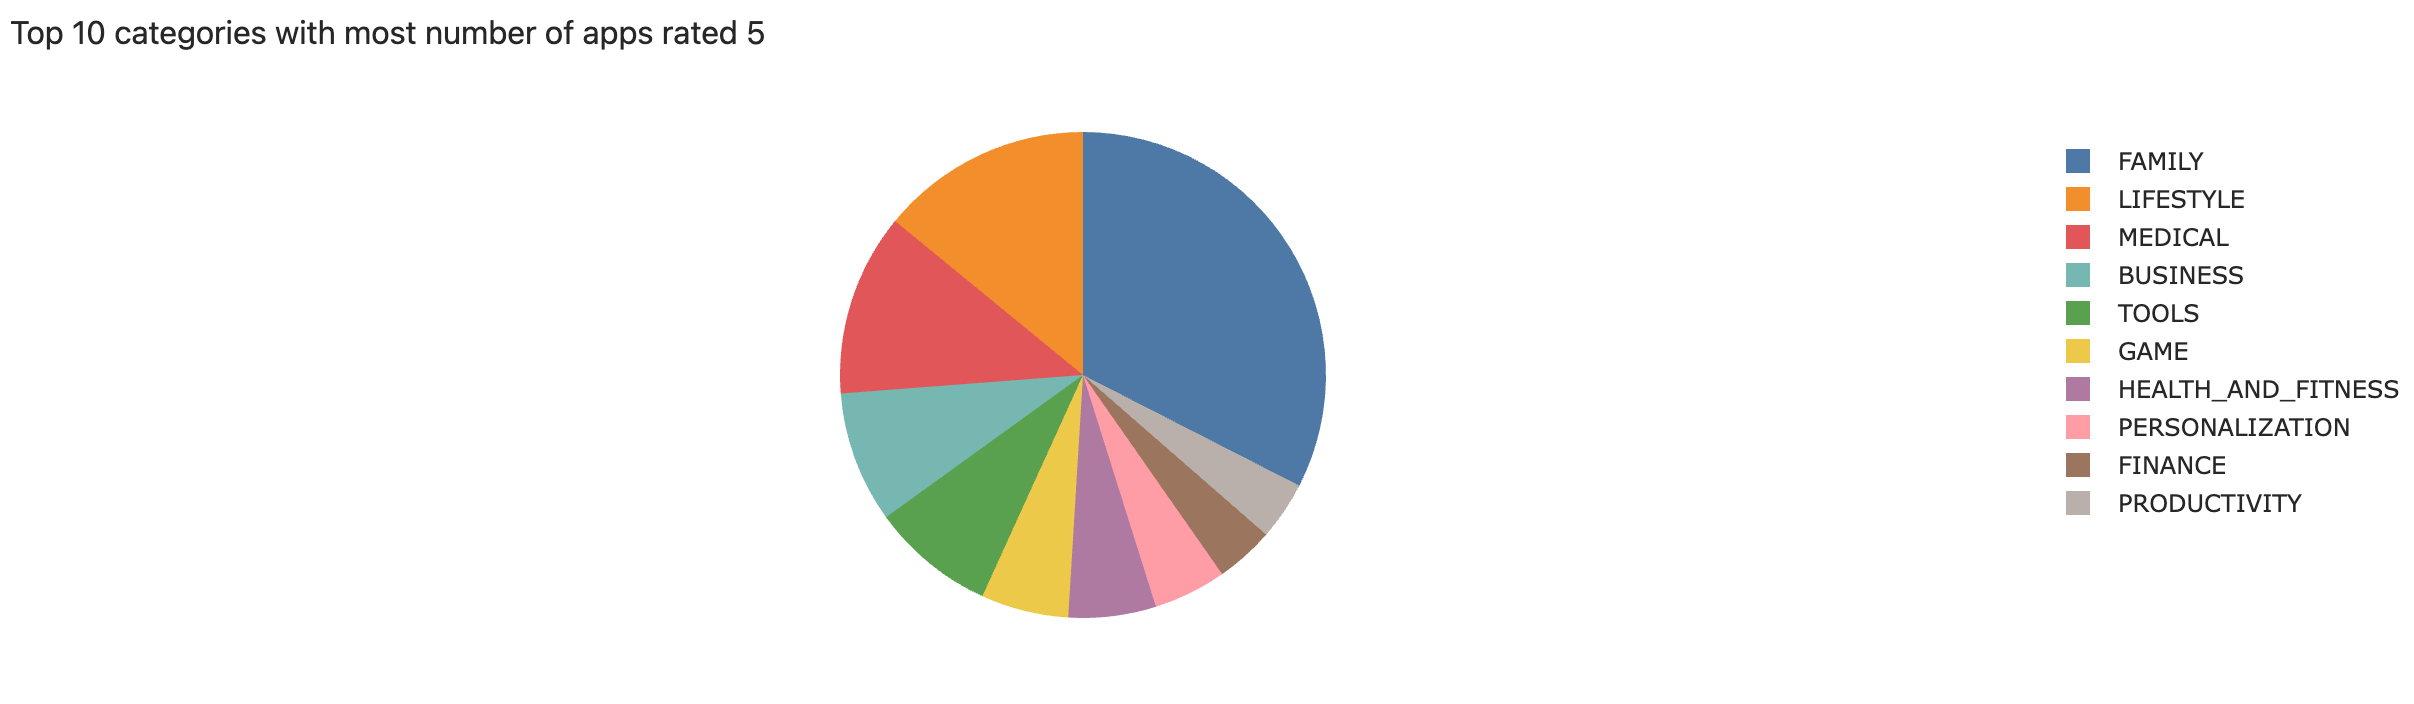

In [8]:
session.widget

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x133a31840>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x133ab79d0>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x133ab5e10>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x133ab5bd0>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x133ab5ae0>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x133ab5a50>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x133ab60e0>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x133ab6080>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x133ab5060>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
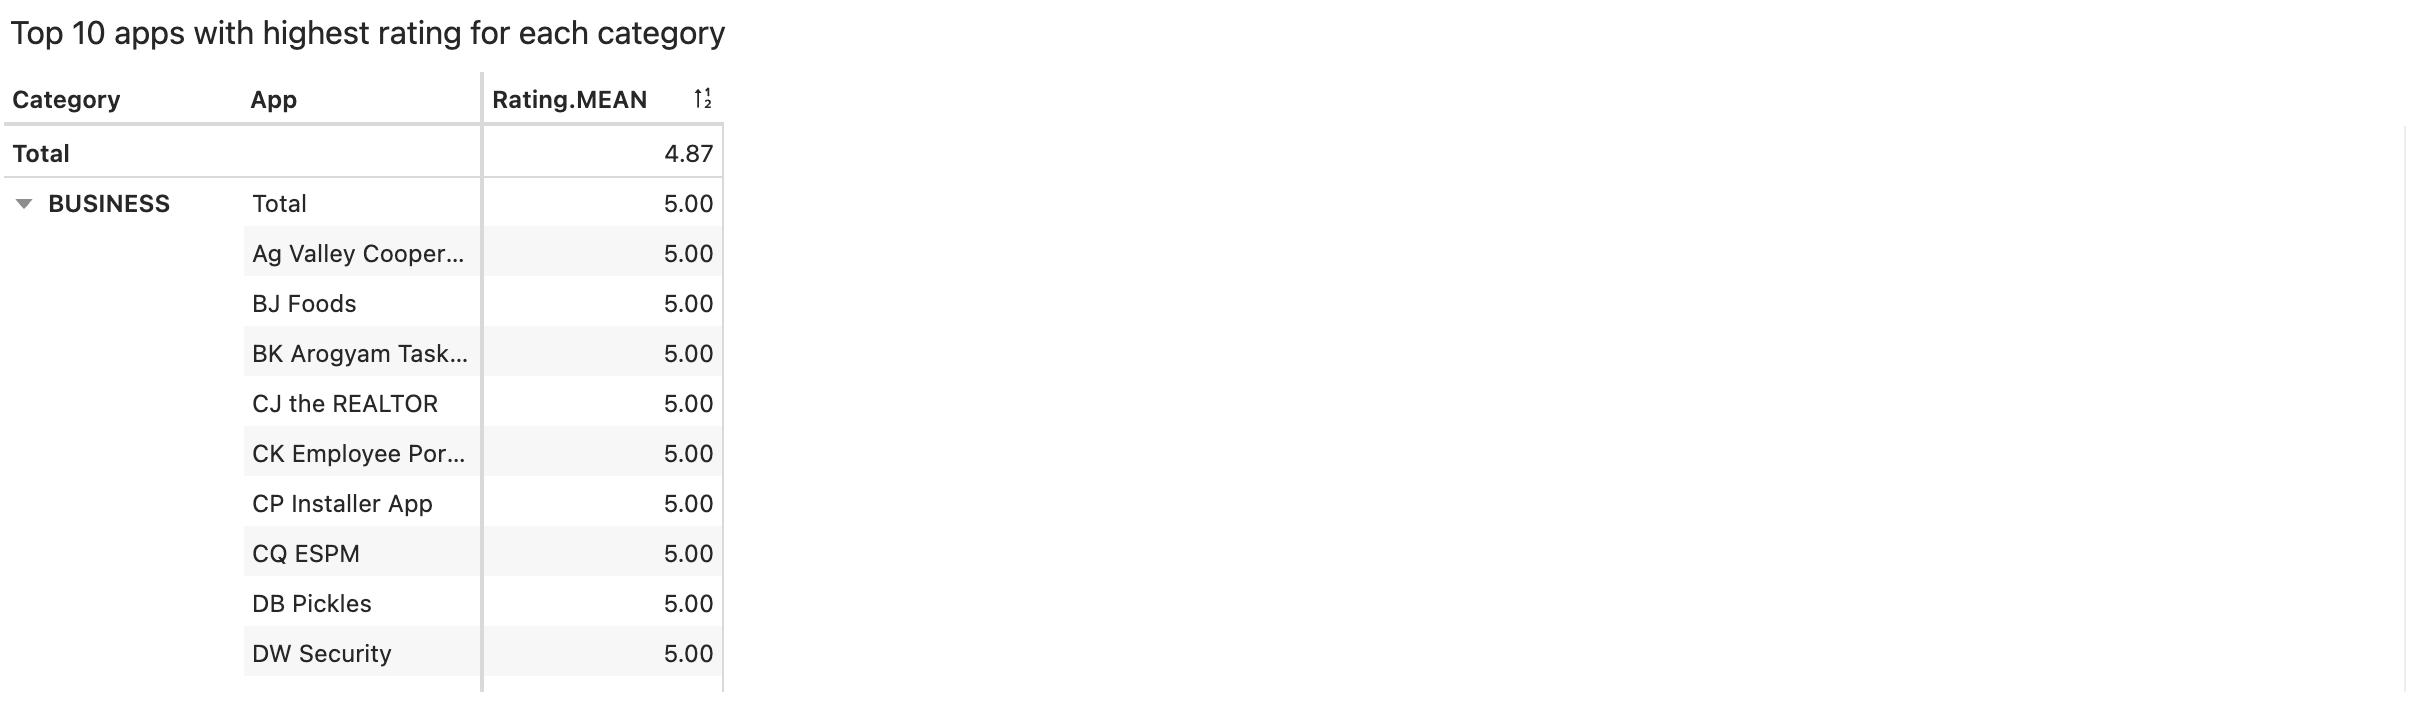

In [10]:
session.widget

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
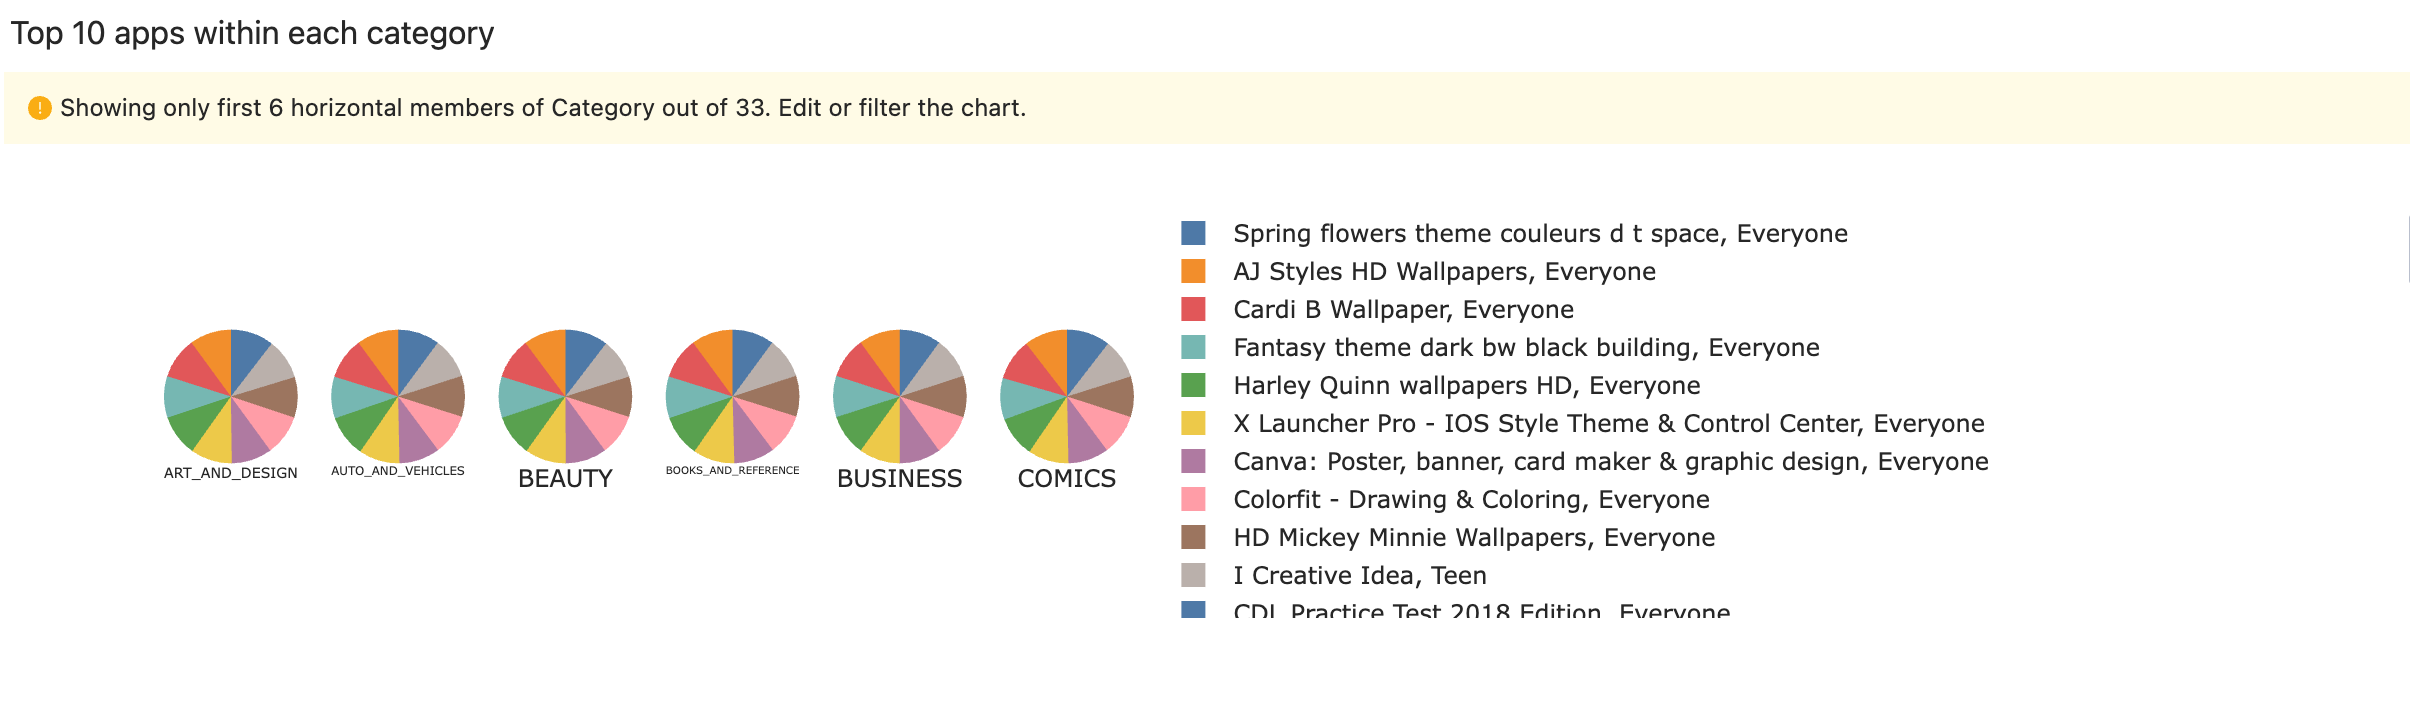

In [11]:
session.widget

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55708/#/dashboard/767

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>